In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
X = dataset.iloc[:, 5].values
y = dataset.iloc[:, 2].values

In [4]:
X[1]

2570

In [5]:
y[1]

538000.0

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

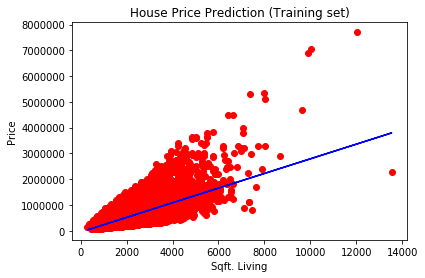

In [8]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train.reshape(-1,1), regressor.predict(X_train.reshape(-1,1)), color = 'blue')
plt.title('House Price Prediction (Training set)')
plt.xlabel('Sqft. Living')
plt.ylabel('Price')
plt.show()

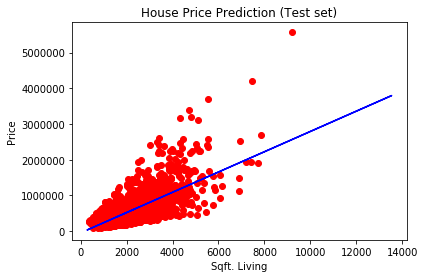

In [9]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
#same as train set because data is fit on training set . plt.plot is line predicted from training set
plt.plot(X_train.reshape(-1,1), regressor.predict(X_train.reshape(-1,1)), color = 'blue')
plt.title('House Price Prediction (Test set)')
plt.xlabel('Sqft. Living')
plt.ylabel('Price')
plt.show()

In [10]:
# Predicting the Train set results
y_train_pred = regressor.predict(X_train.reshape(-1,1))

# Predicting the Test set results
y_test_pred = regressor.predict(X_test.reshape(-1,1))

In [11]:
from sklearn.metrics import mean_squared_error
print("Train Set Mean Squared Error: %E" % mean_squared_error(y_train, y_train_pred))

print("Test Set Mean Squared Error: %E" % mean_squared_error(y_test, y_test_pred))

Train Set Mean Squared Error: 6.997240E+10
Test Set Mean Squared Error: 6.194079E+10


In [12]:
print('Estimated Intercept Coefficient: \n', regressor.intercept_)

Estimated Intercept Coefficient: 
 -48257.063591


In [13]:
print('Number of Coefficients: \n', len(regressor.coef_))

Number of Coefficients: 
 1


In [14]:
features = ['Sqft. Living']

In [15]:
feature_coefficients = pd.DataFrame(list(zip(features,regressor.coef_ )) , columns = ['features' , 'Estimated Coefficients'])
feature_coefficients

,features,Estimated Coefficients
0,Sqft. Living,283.968557
